In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
data_df = pd.read_csv("output.csv")
print(data_df)

/var/folders/7s/7j9cxlw57jz9dscyz4mx7p780000gn/T/ipykernel_51143/1549366539.py:1: DtypeWarning: Columns (23,24,29,33,38,39,92) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("output.csv")


        visitorId  visitNumber     visitId  visitStartTime      date  \
0             NaN            1  1485564412      1485564412  20170127   
1             NaN            1  1485530060      1485530060  20170127   
2             NaN            3  1484755250      1484755250  20170118   
3             NaN            2  1484779945      1484779945  20170118   
4             NaN            1  1484261024      1484261024  20170112   
...           ...          ...         ...             ...       ...   
840451        NaN            5  1483556299      1483556299  20170104   
840452        NaN            1  1483561752      1483561752  20170104   
840453        NaN            1  1483561752      1483561752  20170104   
840454        NaN            5  1483557886      1483557886  20170104   
840455        NaN            1  1483522657      1483522657  20170104   

              fullVisitorId  userId channelGrouping  socialEngagementType  \
0       7117209037706583763     NaN          Direct  Not S

In [3]:
data_df.head()

,visitorId,visitNumber,visitId,visitStartTime,date,fullVisitorId,userId,channelGrouping,socialEngagementType,hitNumber,...,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,NaN,1,1485564412,1485564412,20170127,7117209037706583763,NaN,Direct,Not Socially Engaged,28,...,Northern America,United States,California,Los Angeles CA,Los Angeles,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
1,NaN,1,1485530060,1485530060,20170127,5931595710815442285,NaN,Organic Search,Not Socially Engaged,61,...,Southern Asia,India,Maharashtra,(not set),Pune,not available in demo dataset,anaronline.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,NaN,3,1484755250,1484755250,20170118,6977278011016835466,NaN,Direct,Not Socially Engaged,17,...,Northern Europe,United Kingdom,England,London,London,not available in demo dataset,bushells.com,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,NaN,2,1484779945,1484779945,20170118,9860985959917354993,NaN,Paid Search,Not Socially Engaged,5,...,Northern America,United States,New York,New York NY,New York,not available in demo dataset,verizon.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,NaN,1,1484261024,1484261024,20170112,6129479852732081354,NaN,Paid Search,Not Socially Engaged,20,...,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,rr.com,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [22]:
data_df['addtocart'] = np.where(data_df['action_type']  == 3, '1','0')

/var/folders/7s/7j9cxlw57jz9dscyz4mx7p780000gn/T/ipykernel_51143/1506569784.py:3: UserWarning: 
The palette list has fewer values (6) than needed (64) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y = data_df['v2ProductCategory'].value_counts().index,


Text(0.5, 1.0, 'Product Category Distribution, 10/2016')

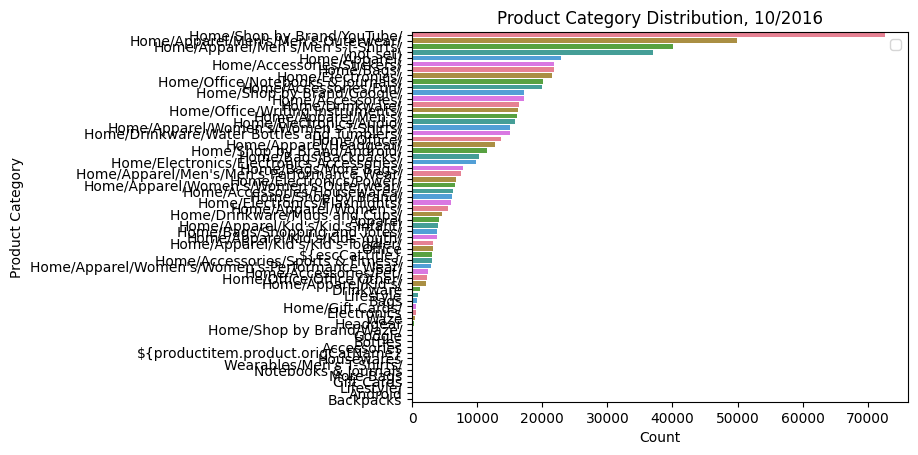

In [29]:


#product category distribution
plt.plot(figsize = (20,40))
sns.barplot(y = data_df['v2ProductCategory'].value_counts().index, 
            x = data_df['v2ProductCategory'].value_counts().values, 
            hue = data_df['v2ProductCategory'].value_counts().index , 
            palette = sns.color_palette('husl'), dodge = False)
plt.legend([])
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.title("Product Category Distribution, 10/2016")

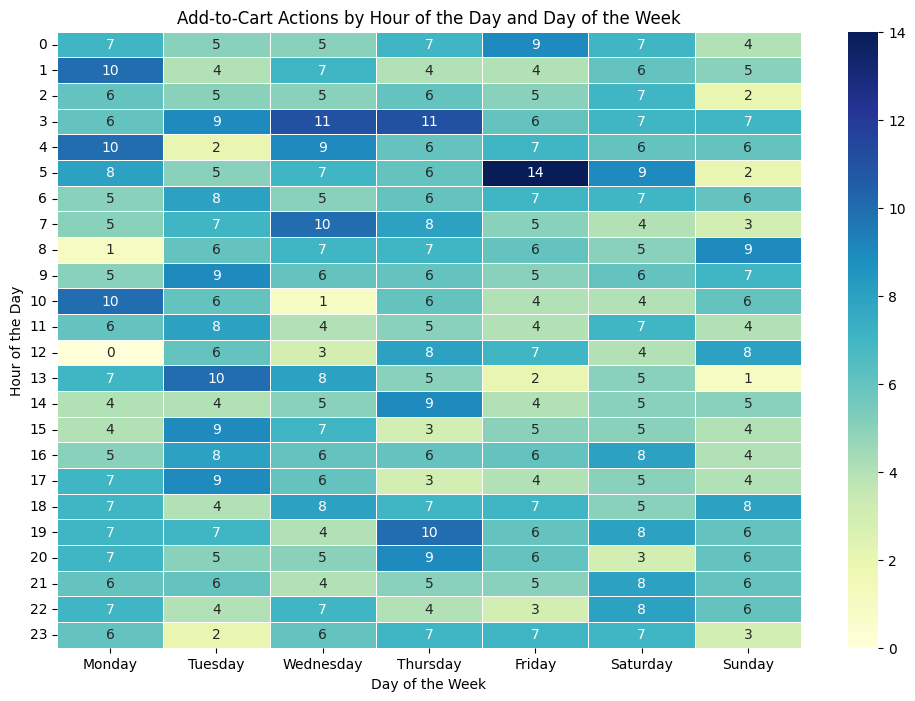

In [35]:
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['day_of_week'] = data_df['date'].dt.day_name()
data_df['hour_of_day'] = data_df['date'].dt.hour

# Generate sample data for demonstration
np.random.seed(0)
hours = np.random.randint(0, 24, 1000)
days = np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 1000)
df = pd.DataFrame({'hour_of_day': hours, 'day_of_week': days})

# Create pivot table
pivot_table = df.pivot_table(index='hour_of_day', columns='day_of_week', aggfunc='size', fill_value=0)

# Reorder columns to display days of the week in chronological order
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Add-to-Cart Actions by Hour of the Day and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.yticks(rotation=0)
plt.show()

In [5]:
pd.set_option('display.max_rows', 300)

In [6]:
data_df.columns

Index(['visitorId', 'visitNumber', 'visitId', 'visitStartTime', 'date',
       'fullVisitorId', 'userId', 'channelGrouping', 'socialEngagementType',
       'hitNumber',
       ...
       'country', 'region', 'metro', 'city', 'cityId', 'networkDomain',
       'latitude', 'longitude', 'networkLocation', 'addtocart'],
      dtype='object', length=302)

In [7]:
data_df.isnull().sum()

visitorId          840456
visitNumber             0
visitId                 0
visitStartTime          0
date                    0
                    ...  
networkDomain           1
latitude                1
longitude               1
networkLocation         1
addtocart               0
Length: 302, dtype: int64

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840456 entries, 0 to 840455
Columns: 302 entries, visitorId to addtocart
dtypes: bool(3), float64(191), int64(13), object(94), uint64(1)
memory usage: 1.9+ GB


In [9]:
null_counts = data_df.isnull().sum()
for i in range(0, len(null_counts), 50):  # Print in chunks of 50 columns
    print(null_counts.iloc[i:i+50])



visitorId                       840456
visitNumber                          0
visitId                              0
visitStartTime                       0
date                                 0
fullVisitorId                        0
userId                          840456
channelGrouping                      0
socialEngagementType                 0
hitNumber                            0
time                                 0
hour                                 0
minute                               0
isSecure                        840456
isInteraction                        0
isEntrance                      657987
isExit                          651588
referer                         677056
type                                 0
dataSource                      840456
pagePath                             0
hostname                             0
pageTitle                           76
searchKeyword                   840105
searchCategory                  840103
pagePathLevel1           

In [10]:

columns_with_all_null = data_df.columns[data_df.isnull().all()]
print(columns_with_all_null)


Index(['visitorId', 'userId', 'isSecure', 'dataSource', 'item_productName',
       'item_productCategory', 'item_productSku', 'item_itemQuantity',
       'item_itemRevenue', 'item_localItemRevenue',
       ...
       'adGroupId', 'creativeId', 'criteriaId', 'customerId', 'boomUserlistId',
       'screenviews', 'uniqueScreenviews', 'timeOnScreen', 'sessionQualityDim',
       'javaEnabled'],
      dtype='object', length=157)


In [11]:
import pandas as pd

# Assuming df is your DataFrame
data = data_df.dropna(axis=1, how='all')

# Now data_df contains the modified DataFrame without modifying df
print(data_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840456 entries, 0 to 840455
Columns: 302 entries, visitorId to addtocart
dtypes: bool(3), float64(191), int64(13), object(94), uint64(1)
memory usage: 1.9+ GB
None


In [12]:

columns_with_all_null = data.columns[data.isnull().all()]
print(columns_with_all_null)

Index([], dtype='object')


In [13]:
data.columns

Index(['visitNumber', 'visitId', 'visitStartTime', 'date', 'fullVisitorId',
       'channelGrouping', 'socialEngagementType', 'hitNumber', 'time', 'hour',
       ...
       'country', 'region', 'metro', 'city', 'cityId', 'networkDomain',
       'latitude', 'longitude', 'networkLocation', 'addtocart'],
      dtype='object', length=145)

In [14]:



columns_to_drop = [col for col in data.columns if col.endswith('Id')]
data_df = data.drop(columns=columns_to_drop)




In [15]:
data_df

,visitNumber,visitStartTime,date,channelGrouping,socialEngagementType,hitNumber,time,hour,minute,isInteraction,...,subContinent,country,region,metro,city,networkDomain,latitude,longitude,networkLocation,addtocart
0,1,1485564412,20170127,Direct,Not Socially Engaged,28,788041,17,0,True,...,Northern America,United States,California,Los Angeles CA,Los Angeles,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,0
1,1,1485530060,20170127,Organic Search,Not Socially Engaged,61,2073536,7,48,True,...,Southern Asia,India,Maharashtra,(not set),Pune,anaronline.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
2,3,1484755250,20170118,Direct,Not Socially Engaged,17,636537,8,11,True,...,Northern Europe,United Kingdom,England,London,London,bushells.com,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
3,2,1484779945,20170118,Paid Search,Not Socially Engaged,5,42081,14,53,True,...,Northern America,United States,New York,New York NY,New York,verizon.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
4,1,1484261024,20170112,Paid Search,Not Socially Engaged,20,386562,14,50,True,...,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,rr.com,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840451,5,1483556299,20170104,Organic Search,Not Socially Engaged,35,537203,11,7,True,...,Northern Europe,Ireland,not available in demo dataset,not available in demo dataset,not available in demo dataset,eircom.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
840452,1,1483561752,20170104,Paid Search,Not Socially Engaged,19,303515,12,34,True,...,Northern America,United States,Georgia,Atlanta GA,Atlanta,comcastbusiness.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
840453,1,1483561752,20170104,Paid Search,Not Socially Engaged,36,592516,12,39,True,...,Northern America,United States,Georgia,Atlanta GA,Atlanta,comcastbusiness.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
840454,5,1483557886,20170104,Referral,Not Socially Engaged,20,256396,11,29,True,...,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,0


In [16]:
num_features=data_df.select_dtypes(exclude=['object'])

In [17]:
num_features

,visitNumber,visitStartTime,date,hitNumber,time,hour,minute,isInteraction,hit_transactionRevenue,hit_transactionTax,...,visits,hits,pageviews,timeOnSite,bounces,totals_transactions,totals_transactionRevenue,newVisits,totalTransactionRevenue,isMobile
0,1,1485564412,20170127,28,788041,17,0,True,NaN,NaN,...,1,76,62.0,1510.0,NaN,1.0,1.534410e+09,1.0,1.535410e+09,False
1,1,1485530060,20170127,61,2073536,7,48,True,NaN,NaN,...,1,85,82.0,3067.0,NaN,NaN,NaN,1.0,NaN,False
2,3,1484755250,20170118,17,636537,8,11,True,NaN,NaN,...,1,18,12.0,670.0,NaN,NaN,NaN,NaN,NaN,False
3,2,1484779945,20170118,5,42081,14,53,True,NaN,NaN,...,1,18,14.0,1117.0,NaN,NaN,NaN,NaN,NaN,False
4,1,1484261024,20170112,20,386562,14,50,True,NaN,NaN,...,1,21,15.0,404.0,NaN,NaN,NaN,1.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840451,5,1483556299,20170104,35,537203,11,7,True,NaN,NaN,...,1,42,33.0,2320.0,NaN,NaN,NaN,NaN,NaN,True
840452,1,1483561752,20170104,19,303515,12,34,True,NaN,NaN,...,1,43,39.0,1335.0,NaN,NaN,NaN,1.0,NaN,True
840453,1,1483561752,20170104,36,592516,12,39,True,NaN,NaN,...,1,43,39.0,1335.0,NaN,NaN,NaN,1.0,NaN,True
840454,5,1483557886,20170104,20,256396,11,29,True,NaN,NaN,...,1,43,35.0,1289.0,NaN,1.0,1.199600e+08,NaN,1.279600e+08,False


In [18]:
# Create a copy of the original DataFrame
new_data_df = data_df.copy()

# Calculate the threshold for dropping columns
threshold = 0.8 * len(new_data_df)

# Drop columns with more than 80% null values
new_data_df.dropna(thresh=threshold, axis=1, inplace=True)


In [19]:
new_data_df

,visitNumber,visitStartTime,date,channelGrouping,socialEngagementType,hitNumber,time,hour,minute,isInteraction,...,subContinent,country,region,metro,city,networkDomain,latitude,longitude,networkLocation,addtocart
0,1,1485564412,20170127,Direct,Not Socially Engaged,28,788041,17,0,True,...,Northern America,United States,California,Los Angeles CA,Los Angeles,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,0
1,1,1485530060,20170127,Organic Search,Not Socially Engaged,61,2073536,7,48,True,...,Southern Asia,India,Maharashtra,(not set),Pune,anaronline.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
2,3,1484755250,20170118,Direct,Not Socially Engaged,17,636537,8,11,True,...,Northern Europe,United Kingdom,England,London,London,bushells.com,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
3,2,1484779945,20170118,Paid Search,Not Socially Engaged,5,42081,14,53,True,...,Northern America,United States,New York,New York NY,New York,verizon.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
4,1,1484261024,20170112,Paid Search,Not Socially Engaged,20,386562,14,50,True,...,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,rr.com,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840451,5,1483556299,20170104,Organic Search,Not Socially Engaged,35,537203,11,7,True,...,Northern Europe,Ireland,not available in demo dataset,not available in demo dataset,not available in demo dataset,eircom.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
840452,1,1483561752,20170104,Paid Search,Not Socially Engaged,19,303515,12,34,True,...,Northern America,United States,Georgia,Atlanta GA,Atlanta,comcastbusiness.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
840453,1,1483561752,20170104,Paid Search,Not Socially Engaged,36,592516,12,39,True,...,Northern America,United States,Georgia,Atlanta GA,Atlanta,comcastbusiness.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,0
840454,5,1483557886,20170104,Referral,Not Socially Engaged,20,256396,11,29,True,...,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,0


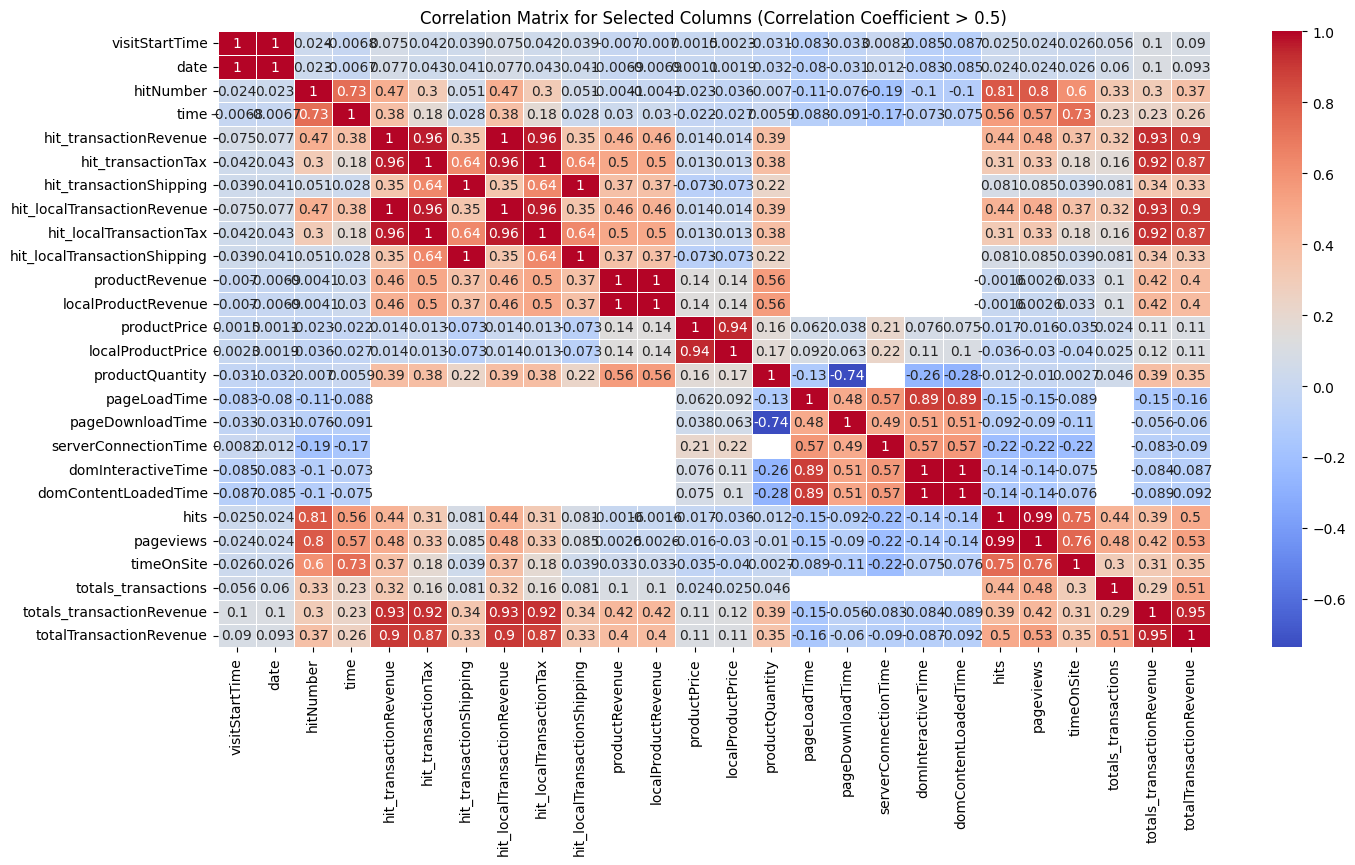

In [20]:


# Calculate correlation matrix
correlation_matrix = num_features.corr()

# Set a threshold for correlation coefficient
threshold = 0.5  # You can adjust this threshold as needed

# Find features with correlation coefficients above the threshold
high_correlation_features = (correlation_matrix > threshold) & (correlation_matrix < 1.0)

# Create a new DataFrame containing only the selected high correlation features
selected_features_df = num_features.loc[:, high_correlation_features.any()]

# Recalculate the correlation matrix for the selected features
correlation_matrix_selected = selected_features_df.corr()

# Plot heatmap for selected columns
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Selected Columns (Correlation Coefficient > 0.5)')
plt.show()
